# Data Cleaning and Preparation
## Problem Statement:
Analyzing Customer Churn in a Telecommunications Company
## Dataset: 
"Telecom_Customer_Churn.csv"
## Description:
The dataset contains information about customers of a telecommunications company and whether they have churned (i.e., discontinued their services). The dataset includes various attributes of the customers, such as their demographics, usage patterns, and account information. The goal is to perform data cleaning and preparation to gain insights into the factors that contribute to customer churn.
## Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,
and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to
predicting customer churn.
9. Normalize or scale the data if necessary.
Faculty of Science and Technology Savitribai Phule Pune University
Syllabus for Fourth Year of Artificial Intelligence and Data Science (2020 Course) 47/126
10. Split the dataset into training and testing sets for further analysis.
11. Export the cleaned dataset for future analysis or modeling.

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

### 2. Load dataset

In [2]:
df = pd.read_csv("Telecom_Customer_Churn.csv")

### 3. Explore dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### 4. Handle missing values

In [7]:
# Strip spaces in 'TotalCharges' (common issue in this dataset)
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

### 5. Remove duplicate records

In [9]:
df = df.drop_duplicates()

### 6. Check for inconsistent formatting

In [10]:
# Check unique values in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print(f"{col}: {df[col].unique()[:10]}")  # show first 10 unique values

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [11]:
df['gender'] = df['gender'].str.strip().str.title()      # e.g., Male/Female standardized
df['PaymentMethod'] = df['PaymentMethod'].str.strip().str.lower()

### 7. Convert columns to correct data types

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['tenure'] = df['tenure'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

### 8. Handle outliers (example: MonthlyCharges & TotalCharges)

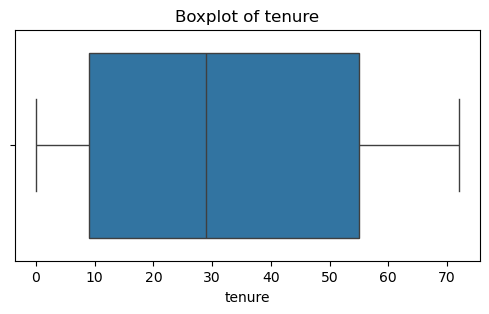

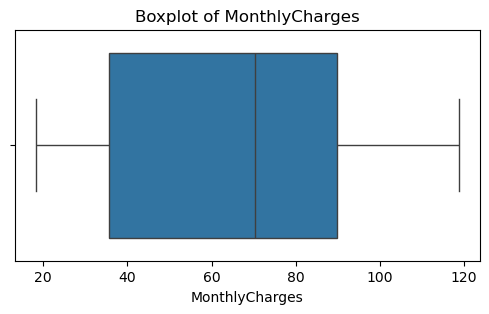

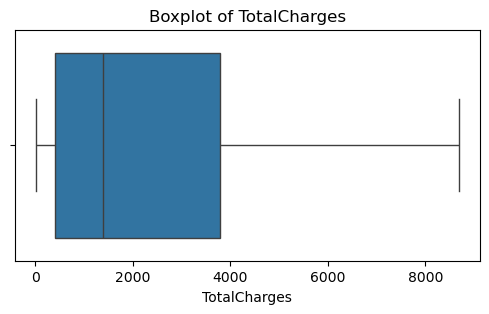

In [14]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [15]:
for col in ['MonthlyCharges', 'TotalCharges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, df[col])  # cap
    df[col] = np.where(df[col] < lower, lower, df[col])  # floor

### 9. Feature engineering

In [16]:
df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)  # avoid div by 0
df['HasDependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['IsSenior'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)

### 10. Encode categorical variables

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('customerID')  # don't encode IDs

In [18]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

### 11. Normalize/scale numerical features

In [19]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']
df[num_cols] = scaler.fit_transform(df[num_cols])

### 12. Split into train & test

In [20]:
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']  # already encoded above

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### 13. Export cleaned dataset


In [22]:
df.to_csv("Telecom_Customer_Churn_Cleaned.csv", index=False)
print("✅ Data cleaning & preparation complete. Cleaned dataset exported.")

✅ Data cleaning & preparation complete. Cleaned dataset exported.
